In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#lets start with tabular data we have two ways pca and lda method
#pca->unsupervised method
#lda->supervised method

In [3]:
x=np.load('/content/drive/MyDrive/Colab Notebooks/Copy of X_train_tabular.npy')

In [4]:
y=np.load('/content/drive/MyDrive/Colab Notebooks/Copy of y_train_tabular.npy')

In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
pca = PCA(n_components=2)  #already 12 features reduce to 6 maybe at first
X_pca = pca.fit_transform(x_scaled)

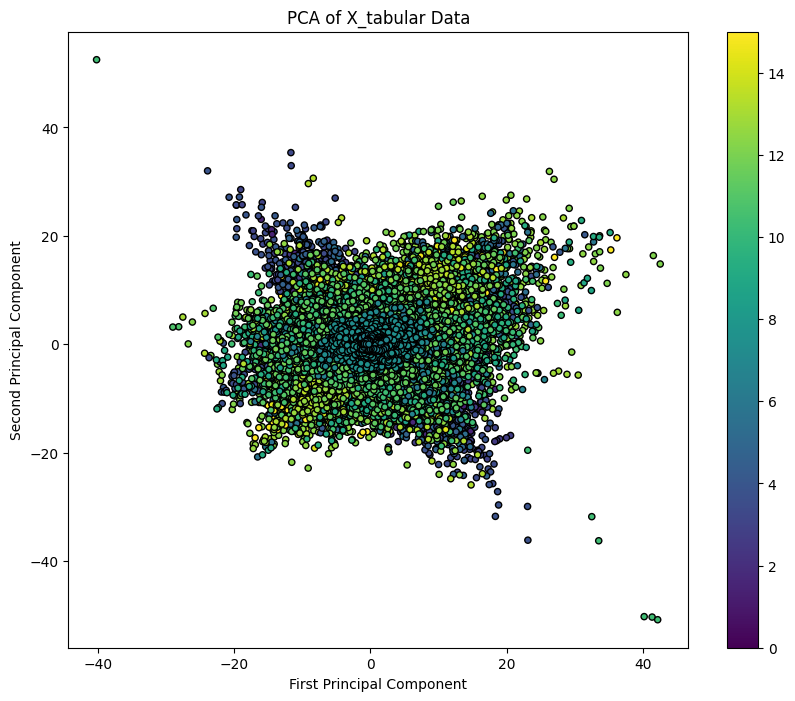

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y[:, 0], cmap='viridis', edgecolor='k', s=20)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of X_tabular Data')
plt.colorbar()
plt.show()

In [10]:
pca_3d=PCA(3)
X_pca_3d=pca_3d.fit_transform(x_scaled)

In [14]:
y_colors = y[:, 0] if y.ndim > 1 else y

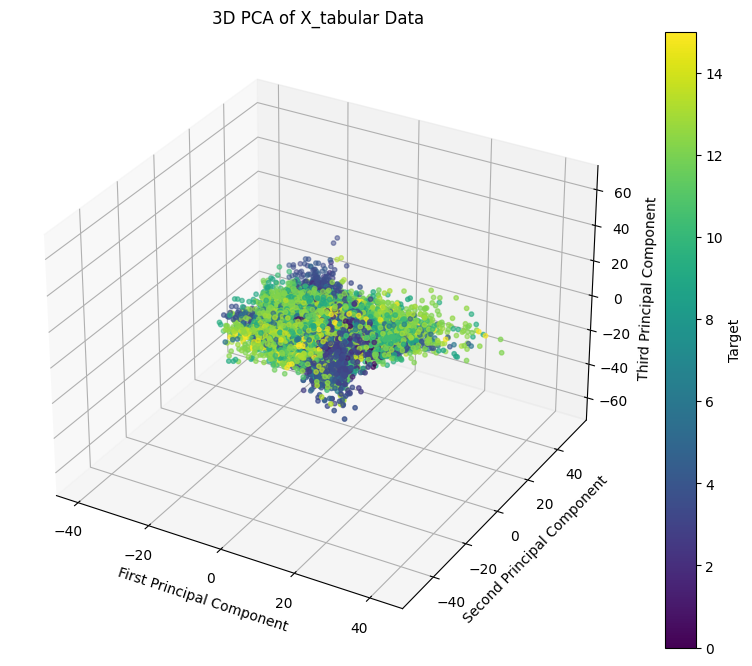

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_colors[:X_pca_3d.shape[0]], cmap='viridis', s=10)

# Labels and title
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('3D PCA of X_tabular Data')

# Color bar
plt.colorbar(sc, ax=ax, label='Target')

# Show the plot
plt.show()

In [17]:
import seaborn as sns

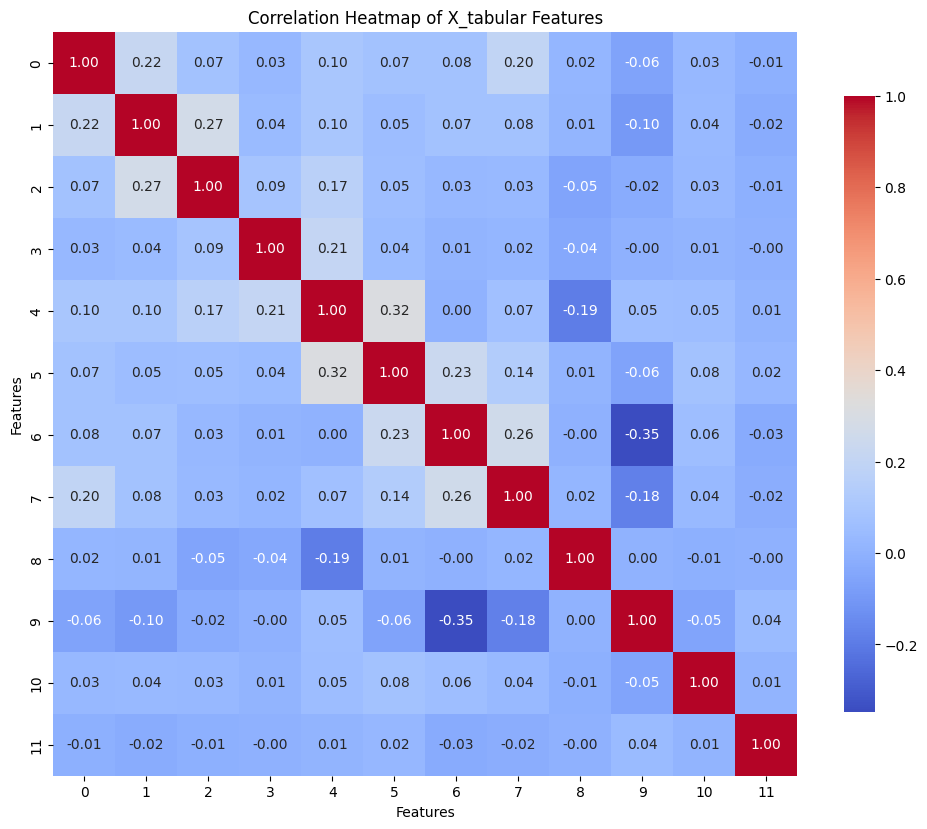

In [18]:
corr_matrix = np.corrcoef(x.T)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Labels and title
plt.title('Correlation Heatmap of X_tabular Features')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [19]:
#LDA

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

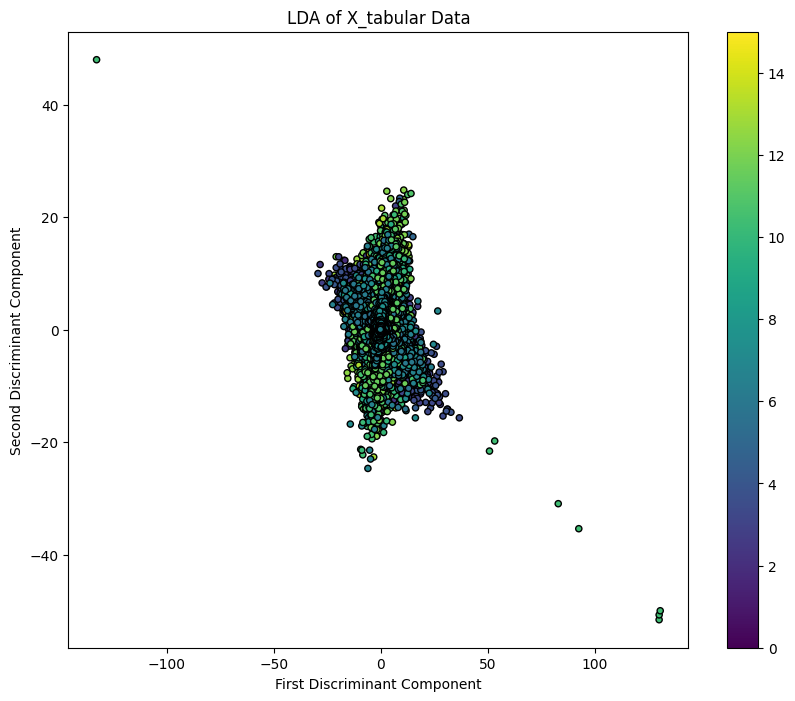

In [23]:
lda = LDA(n_components=2)  # Reduce to 2 components for 2D plot
y_labels = np.argmax(y, axis=1)
X_lda = lda.fit_transform(x, y_labels)
# Plotting the LDA result
plt.figure(figsize=(10, 8))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_colors[:X_lda.shape[0]], cmap='viridis', edgecolor='k', s=20)
plt.colorbar()
plt.title('LDA of X_tabular Data')
plt.xlabel('First Discriminant Component')
plt.ylabel('Second Discriminant Component')
plt.show()

In [26]:
#sequential data

In [27]:
x_seq=np.load('/content/drive/MyDrive/Colab Notebooks/X_train_padding.npy')

In [28]:
y_seq=np.load('/content/drive/MyDrive/Colab Notebooks/y_train_padding.npy')

In [29]:
x_seq.shape

(203, 12246, 12)

In [32]:
num_sequences = 203
sequence_length = 12246
num_features = 12

In [31]:
num_samples=203*12246

In [33]:
x_flattened=x_seq.reshape(num_samples, num_features)

In [34]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_flattened)

In [37]:
 pca = PCA(n_components=2) #2d plotting
data_pca = pca.fit_transform(x_scaled)
# Reshape PCA results back to a 3D tensor
data_pca_reshaped = data_pca.reshape(num_sequences, sequence_length, 2)

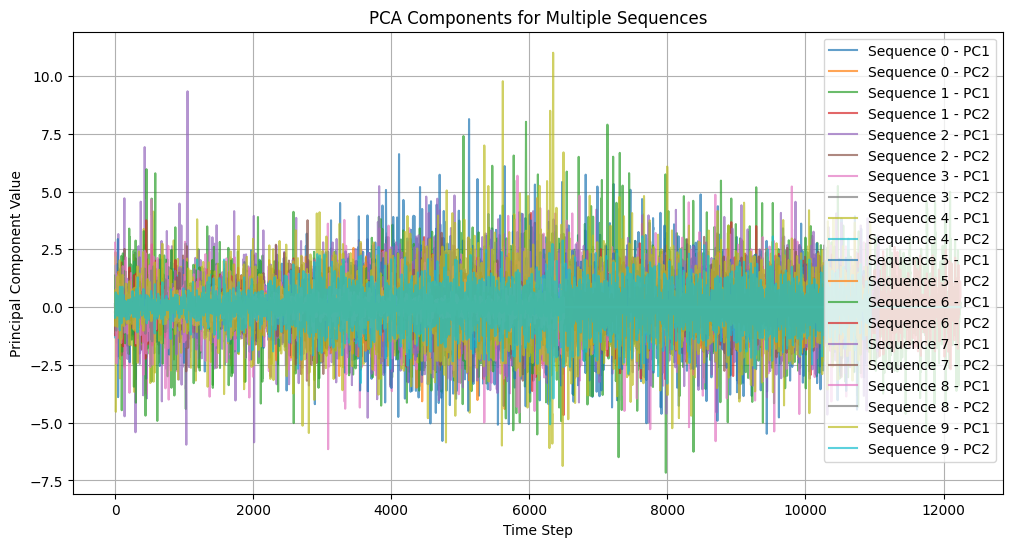

In [38]:
plt.figure(figsize=(12, 6))
for i in range(min(10, num_sequences)):  # Plot up to 10 sequences
    plt.plot(data_pca_reshaped[i, :, 0], label=f'Sequence {i} - PC1', alpha=0.7)
    plt.plot(data_pca_reshaped[i, :, 1], label=f'Sequence {i} - PC2', alpha=0.7)
plt.title('PCA Components for Multiple Sequences')
plt.xlabel('Time Step')
plt.ylabel('Principal Component Value')
plt.legend()
plt.grid(True)
plt.show()

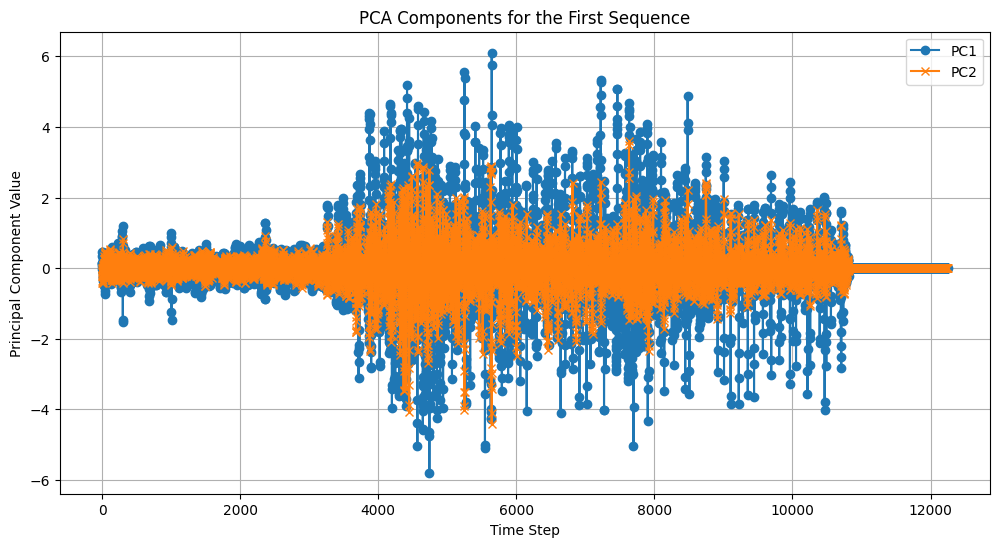

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(data_pca_reshaped[0, :, 0], label='PC1', marker='o')
plt.plot(data_pca_reshaped[0, :, 1], label='PC2', marker='x')
plt.title('PCA Components for the First Sequence')
plt.xlabel('Time Step')
plt.ylabel('Principal Component Value')
plt.legend()
plt.grid(True)
plt.show()